# Owen Elsley
## Exploratory Data Analysis and Visualization of Hotel Booking Demand database

### For the furtherance of a portfolio of work upon completion of the Cambridge Spark Data Analysis Bootcamp

### Import libraries and data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('Set2')
paired_palette = sns.color_palette('Paired')
sns.set_palette(palette)

In [3]:
df = pd.read_csv('data/hotel_bookings.csv')

### Preliminary exploration of DataFrame

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df_null = df.count()
df_null

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
df.describe(include=np.number)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Clean data

#### Create copy for cleaning

In [9]:
df_clean = df.copy()

#### Rename columns

In [10]:
rename = {'hotel':'type',
          'is_canceled':'cancelled',
          'arrival_date_year':'arrival_year',
          'arrival_date_month':'arrival_month',
          'arrival_date_week_number':'arrival_week',
          'arrival_date_day_of_month':'arrival_day',
          'stays_in_weekend_nights':'weekend_nights',
          'stays_in_week_nights':'week_nights',
          'is_repeated_guest':'repeat_guest',
          'reserved_room_type':'room_type_r',
          'assigned_room_type':'room_type_a',
          'deposit_type':'deposit',
          'required_car_parking_spaces':'parking_spaces',
          'total_of_special_requests':'special_requests'
         }

df_clean.rename(columns=rename, inplace=True)

#### Deal with NULL values

In [11]:
df_clean.isnull().sum()

type                                   0
cancelled                              0
lead_time                              0
arrival_year                           0
arrival_month                          0
arrival_week                           0
arrival_day                            0
weekend_nights                         0
week_nights                            0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
repeat_guest                           0
previous_cancellations                 0
previous_bookings_not_canceled         0
room_type_r                            0
room_type_a                            0
booking_changes                        0
deposit                                0
agent                              16340
company         

In [12]:
(df_clean['country'].isnull().sum()/len(df_clean))*100

0.40874445095904177

In the `agent` and `company` columns, NULL values correspond not to missing data, but to there being no agent or company involved. Therefore, these values are replaced with 'None'.

In `country`, the missing data represents only 0.41% of the total data. As this is categorical data, NULL values have been imputed with the mode.

In `children`, the missing data only affects 4 rows, so these can be excluded without significantly affecting the analysis.

In [13]:
df_clean.fillna(value={'company':'none','agent':'none','country':df_clean['country'].mode()[0]}, inplace=True)
df_clean.dropna(subset='children', inplace=True)

In [14]:
df_clean.isnull().sum()

type                              0
cancelled                         0
lead_time                         0
arrival_year                      0
arrival_month                     0
arrival_week                      0
arrival_day                       0
weekend_nights                    0
week_nights                       0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
repeat_guest                      0
previous_cancellations            0
previous_bookings_not_canceled    0
room_type_r                       0
room_type_a                       0
booking_changes                   0
deposit                           0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### Data types

`children` should be an integer (cannot have a decimal child). `arrival_month` has been converted to numerical form as `arrival_month_n` for ease of sorting.

In [22]:
df_clean = df_clean.astype({'children':'int64'})

df_clean['arrival_month_n'] = pd.to_datetime(df_clean['arrival_month'], format='%B').dt.month
df_clean.insert(8, 'arrival_month_n', df_clean.pop('arrival_month_n'))

df_clean.dtypes

type                               object
cancelled                           int64
lead_time                           int64
arrival_year                        int64
arrival_month                      object
arrival_week                        int64
arrival_day                         int64
weekend_nights                      int64
arrival_month_n                     int32
week_nights                         int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
repeat_guest                        int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
room_type_r                        object
room_type_a                        object
booking_changes                     int64
deposit                           

#### Extracting further information
The `arrival_day`, `arrival_month`, and `arrival_year` columns have been concatenated into a `datetime` type `arrival_date` column. This is then used to extrapolate an `arrival_dow` column, which shows the day of the week of arrival.

The `arrival_date` in conjunction with `lead_time` has been used to extrapolate the day of the week that the booking was made.

`total_nights` is the sum of all `weekend_nights` and `week_nights`.

`total_youth` is the sum of `children` and `babies`. `total_guests` is the sum of all `adults`, `children`, and `babies`.

`room_fulfilled` is a boolean for whether the requested room type (`room_type_r`) matches the room type allocated (`room_type_a`).

In [23]:
df_clean['arrival_date'] = df_clean['arrival_day'].astype('str')+' '+df_clean['arrival_month']+' '+df_clean['arrival_year'].astype('str')
df_clean['arrival_date'] = pd.to_datetime(df_clean['arrival_date'],format='mixed')
df_clean['arrival_dow'] = df_clean['arrival_date'].dt.day_name()
df_clean.insert(3, 'arrival_date', df_clean.pop('arrival_date'))
df_clean.insert(11, 'arrival_dow', df_clean.pop('arrival_dow'))

df_clean['booking_date'] = df_clean['arrival_date'] - pd.to_timedelta(df_clean['lead_time'], unit='d')
df_clean['booking_dow'] = df_clean['booking_date'].dt.day_name()
df_clean.insert(2, 'booking_date', df_clean.pop('booking_date'))
df_clean.insert(3, 'booking_dow', df_clean.pop('booking_dow'))

df_clean['total_nights'] = df_clean['week_nights']+df_clean['weekend_nights']
df_clean.insert(11, 'total_nights', df_clean.pop('total_nights'))

df_clean['total_guests'] = df_clean['adults']+df_clean['children']+df_clean['babies']
df_clean['total_youth'] = df_clean['children']+df_clean['babies']
df_clean.insert(15, 'total_guests', df_clean.pop('total_guests'))
df_clean.insert(17, 'total_youth', df_clean.pop('total_youth'))

df_clean['room_fulfilled'] = df_clean['room_type_r'] == df_clean['room_type_a']
df_clean.insert(30, 'room_fulfilled', df_clean.pop('room_fulfilled'))

#### Deal with outliers and inconsistent data

From the `.describe()` output above, there are several features that need examining.

**1)** It should not be possible for a room to be booked by only a child without any adult, so any rows with `adults==0` should be excluded from the data.

In [24]:
len(df_clean[df_clean['adults']==0])*100/len(df_clean)

0.3375605179836832

In [25]:
df_clean = df_clean[df_clean['adults']!=0]

len(df_clean[df_clean['adults']==0])

0

In [26]:
df_clean.shape

(118983, 41)

**2)** It should not be possible to have the total number of nights stayed be 0, so any rows with `total_nights==0` should be excluded from the data.

In [27]:
len(df_clean['total_nights'][df_clean['total_nights']==0])/len(df_clean)*100

0.542094248758226

In [28]:
df_clean = df_clean[df_clean['total_nights']!=0]

len(df_clean[df_clean['total_nights']==0])

0

In [29]:
df_clean.shape

(118338, 41)

In [30]:
# reset index

df_clean.reset_index(drop=True,inplace=True)

**3)** The `meal` column contains two sets of values that correspond to the same outcome; that is, `SC` and `Undefined` both meaning that no meal package was included. (This is according to the original creators of the dataset). As such, all values have been made consistently `SC`.

In [31]:
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [32]:
df_clean.replace('Undefined','SC',inplace=True);
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

**4)** It should not be possible for the Average Daily Rate (ADR) to be negative. There is also at least one outlier as the maximum is unexpectedly high.

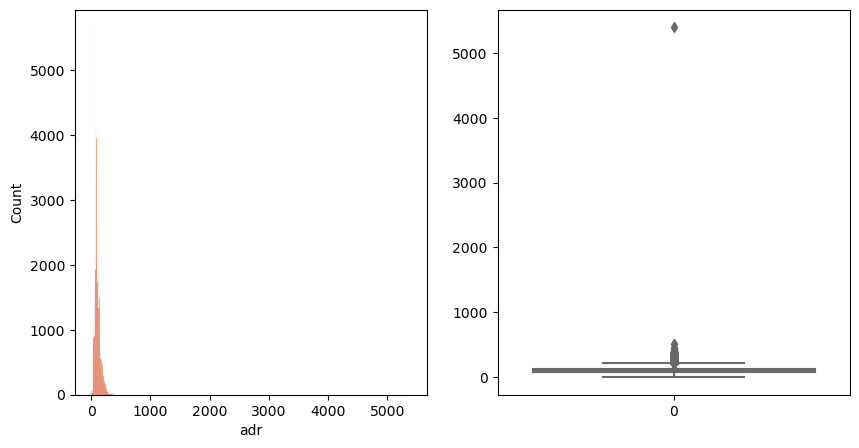

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

sns.histplot(df_clean['adr'], color=palette[1], ax=ax1);

sns.boxplot(df_clean['adr'], color=palette[1], ax=ax2);

In [34]:
df_clean['adr'][df_clean['adr']<0]

14879   -6.38
Name: adr, dtype: float64

In [35]:
df_clean['adr'][df_clean['adr']>500]

14992      508.0
48055     5400.0
110393     510.0
Name: adr, dtype: float64

It seems that the entry with `5400` is erroneous. This might be an input error (e.g. should be `540` or `504`), but it is not possible to know. As it is only one entry, this has been excluded from the data.

In [36]:
df_clean.drop(index=df_clean['adr'].idxmax(),inplace=True)
df_clean.drop(index=df_clean['adr'].idxmin(),inplace=True)

In [37]:
len(df_clean[df_clean['adr']==0])

1159

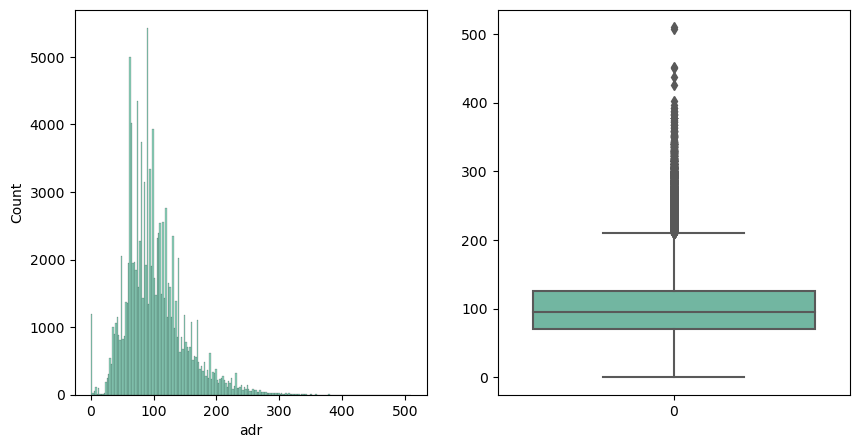

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

sns.histplot(df_clean['adr'], ax=ax1);

sns.boxplot(df_clean['adr'], ax=ax2);

The data is still quite positively (right) skewed, but at the values above the upper quartile are fairly continuous and not usuaully high they have been kept.

#### Check for duplicate values

In [40]:
print(f'Duplicated rows: {df_clean.duplicated().sum()} \nWhich equates to {round(df_clean.duplicated().sum()*100/len(df_clean),2)}% of the total data')

Duplicated rows: 31941 
Which equates to 26.99% of the total data


There are a significant number of duplicate values. However, given the data is anonymized, it is not possible to tell whether mutliple bookings with the same parameters were made on the same day. As such, the decision has been made to retain the data.

In [41]:
df_clean.shape

(118336, 41)

In [42]:
df_clean.head()

,type,cancelled,booking_date,booking_dow,lead_time,arrival_date,arrival_year,arrival_month,arrival_week,arrival_day,...,deposit,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,2015-06-24,Wednesday,7,2015-07-01,2015,July,27,1,...,No Deposit,none,none,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,2015-06-18,Thursday,13,2015-07-01,2015,July,27,1,...,No Deposit,304.0,none,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,2015-06-17,Wednesday,14,2015-07-01,2015,July,27,1,...,No Deposit,240.0,none,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,2015-06-17,Wednesday,14,2015-07-01,2015,July,27,1,...,No Deposit,240.0,none,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,2015-07-01,Wednesday,0,2015-07-01,2015,July,27,1,...,No Deposit,none,none,0,Transient,107.0,0,0,Check-Out,2015-07-03


We are now ready to move on to visualising and analysing the data.

## Data visualisation

#### Separate cancelled from fulfilled

In [43]:
df_f = df_clean[df_clean['cancelled']==0]
df_c = df_clean[df_clean['cancelled']==1]

#### ADR by Lead Time

Does booking well in advance of the arrival date get you a better rate?

In [46]:
mean_adr_by_lead = df_clean.groupby(['lead_time'])['adr'].mean()

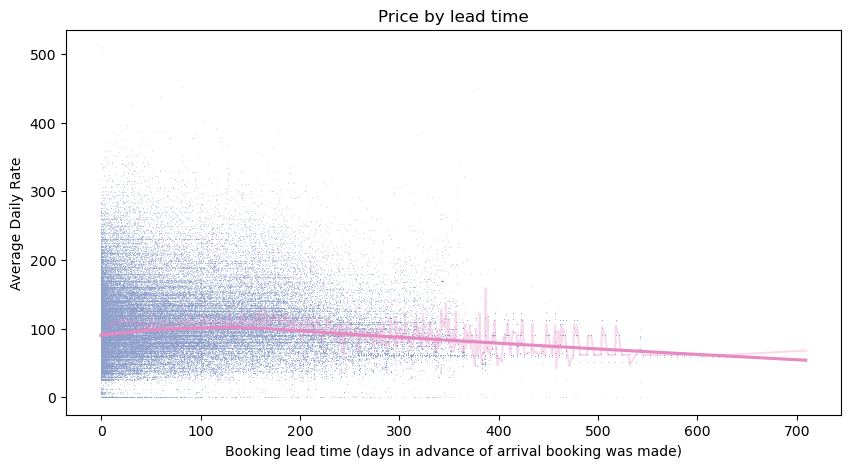

<Figure size 640x480 with 0 Axes>

In [358]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(data=df_clean,
            x='lead_time', y='adr',
            lowess=True,
            scatter_kws={'lw':0,'s':0.5,'alpha':0.3,'color':palette[2]},
            line_kws={'color':palette[3]},
            ax=ax
           );
ax.plot(mean_adr_by_lead, alpha=0.3,color=palette[3])
plt.title('Price by lead time')
plt.ylabel('Average Daily Rate')
plt.xlabel('Booking lead time (days in advance of arrival booking was made)')
plt.show()

plt.savefig('price_lead.png')

#### ADR by Booking Day of Week

Does booking on a Tuesday save you money?

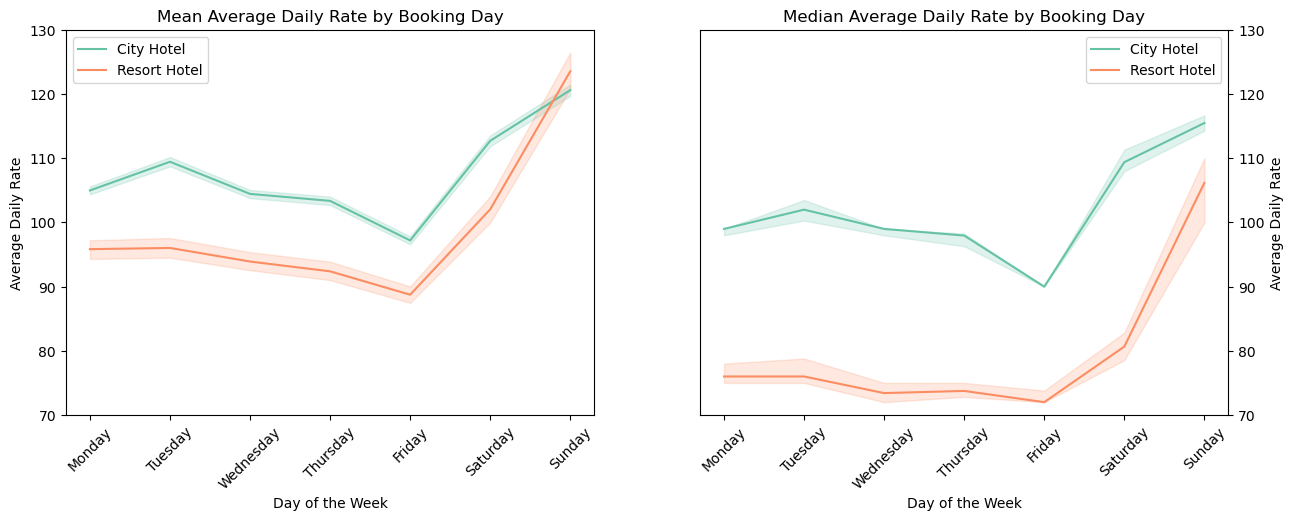

In [47]:
days = {'Monday':1,
       'Tuesday':2,
       'Wednesday':3,
       'Thursday':4,
       'Friday':5,
       'Saturday':6,
       'Sunday':7}

book_dow_price = df_clean[['type','booking_dow','adr']]
book_dow_price = book_dow_price.sort_values(by='booking_dow',key=lambda x: x.map(days))
# daily_price.groupby('booking_dow',as_index=False)['adr'].mean()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(data=book_dow_price,
             x="booking_dow", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             ax=ax1)
ax1.set_title("Mean Average Daily Rate by Booking Day")
ax1.legend(title=None);
ax1.set_xlabel("Day of the Week")
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("Average Daily Rate")
ax1.set_ylim(70,130)

sns.lineplot(data=book_dow_price,
             x="booking_dow", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             estimator=np.median,
             ax=ax2)
ax2.set_title("Median Average Daily Rate by Booking Day")
ax2.legend(title=None);
ax2.set_xlabel("Day of the Week")
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel("Average Daily Rate")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_ylim(70,130)


plt.show()

#### Which Day is best?

Does the day of the week, or day of the month, of arrival have an effect on the price? Are certain days more popular for arrival?

In [48]:
daily_book = df_f[['type','arrival_day','arrival_dow','total_guests','adults','total_youth']]

In [49]:
arr_day_price = df_clean[['type','arrival_day','arrival_dow','adr','total_guests','adults','total_youth']].sort_values(by='arrival_dow',key=lambda x: x.map(days))

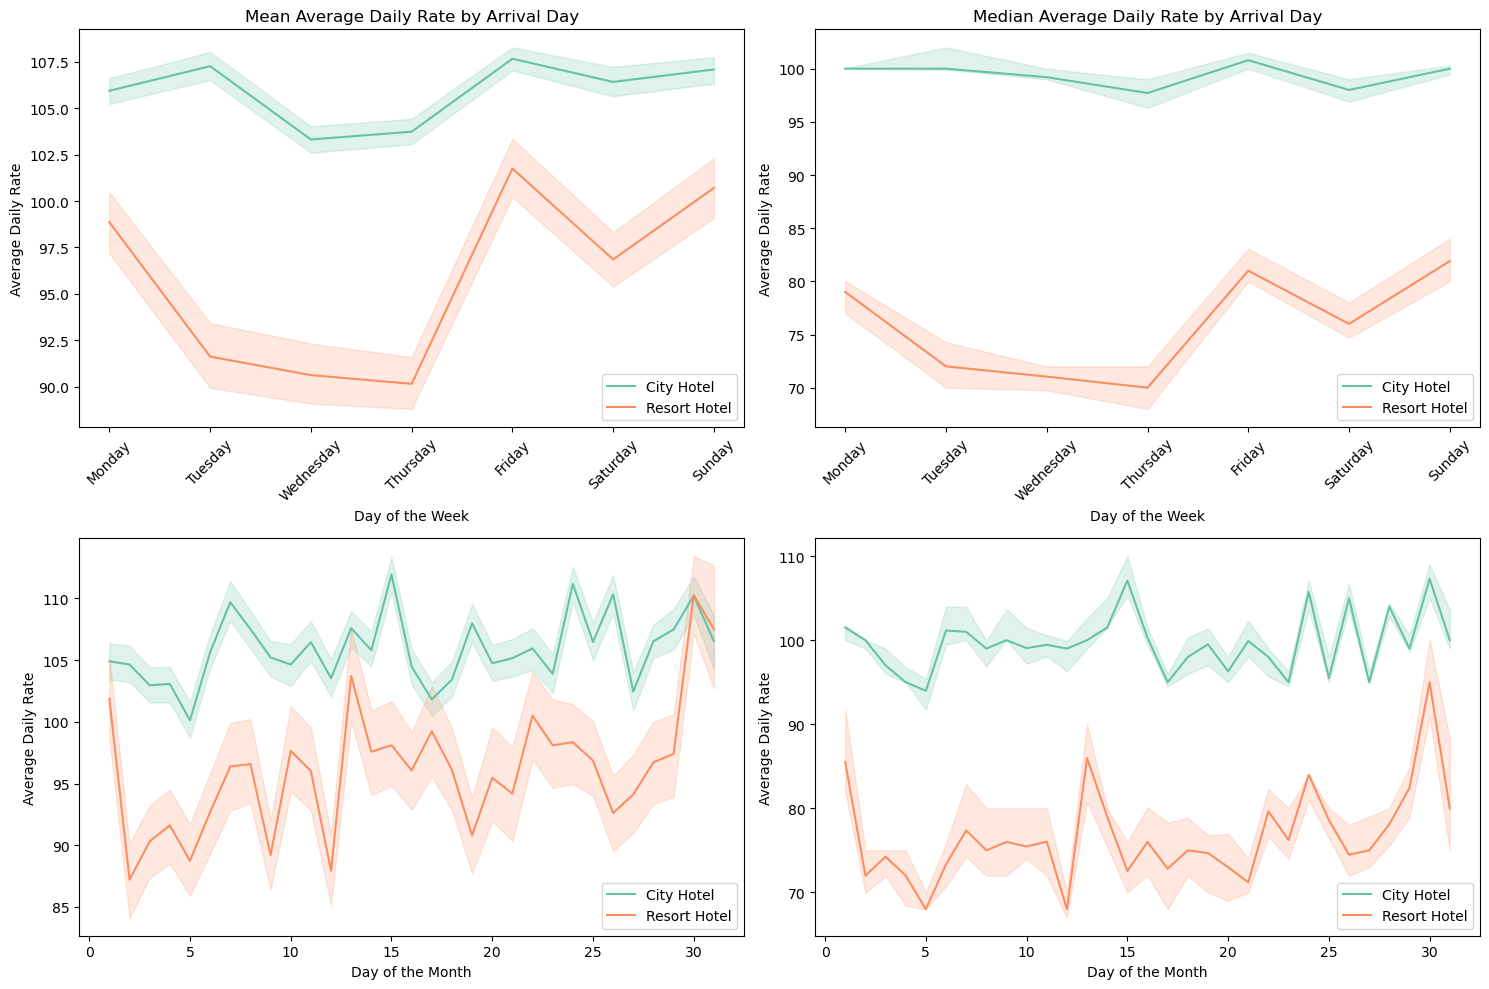

In [50]:
fig, axs = plt.subplots(2,2,figsize=(15,10))


# Mean ADR by Day of Week
sns.lineplot(data=arr_day_price,
             x="arrival_dow", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             ax=axs[0][0])
axs[0][0].set_title("Mean Average Daily Rate by Arrival Day")
axs[0][0].legend(title=None,loc='lower right')
axs[0][0].set_xlabel("Day of the Week")
axs[0][0].tick_params(axis='x', rotation=45)
axs[0][0].set_ylabel("Average Daily Rate")


# Median ADR by Day of Week
sns.lineplot(data=arr_day_price,
             x="arrival_dow", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             estimator=np.median,
             ax=axs[0][1])
axs[0][1].set_title("Median Average Daily Rate by Arrival Day")
axs[0][1].legend(title=None,loc='lower right')
axs[0][1].set_xlabel("Day of the Week")
axs[0][1].tick_params(axis='x', rotation=45)
axs[0][1].set_ylabel("Average Daily Rate")


# Mean ADR by Day of Month
sns.lineplot(data=arr_day_price,
             x="arrival_day", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             ax=axs[1][0])
axs[1][0].legend(title=None,loc='lower right')
axs[1][0].set_xlabel("Day of the Month")
axs[1][0].set_ylabel("Average Daily Rate")


# Median ADR by Day of Month
sns.lineplot(data=arr_day_price,
             x="arrival_day", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             estimator=np.median,
             ax=axs[1][1])
axs[1][1].legend(title=None,loc='lower right')
axs[1][1].set_xlabel("Day of the Month")
axs[1][1].set_ylabel("Average Daily Rate")

plt.tight_layout()
plt.show()

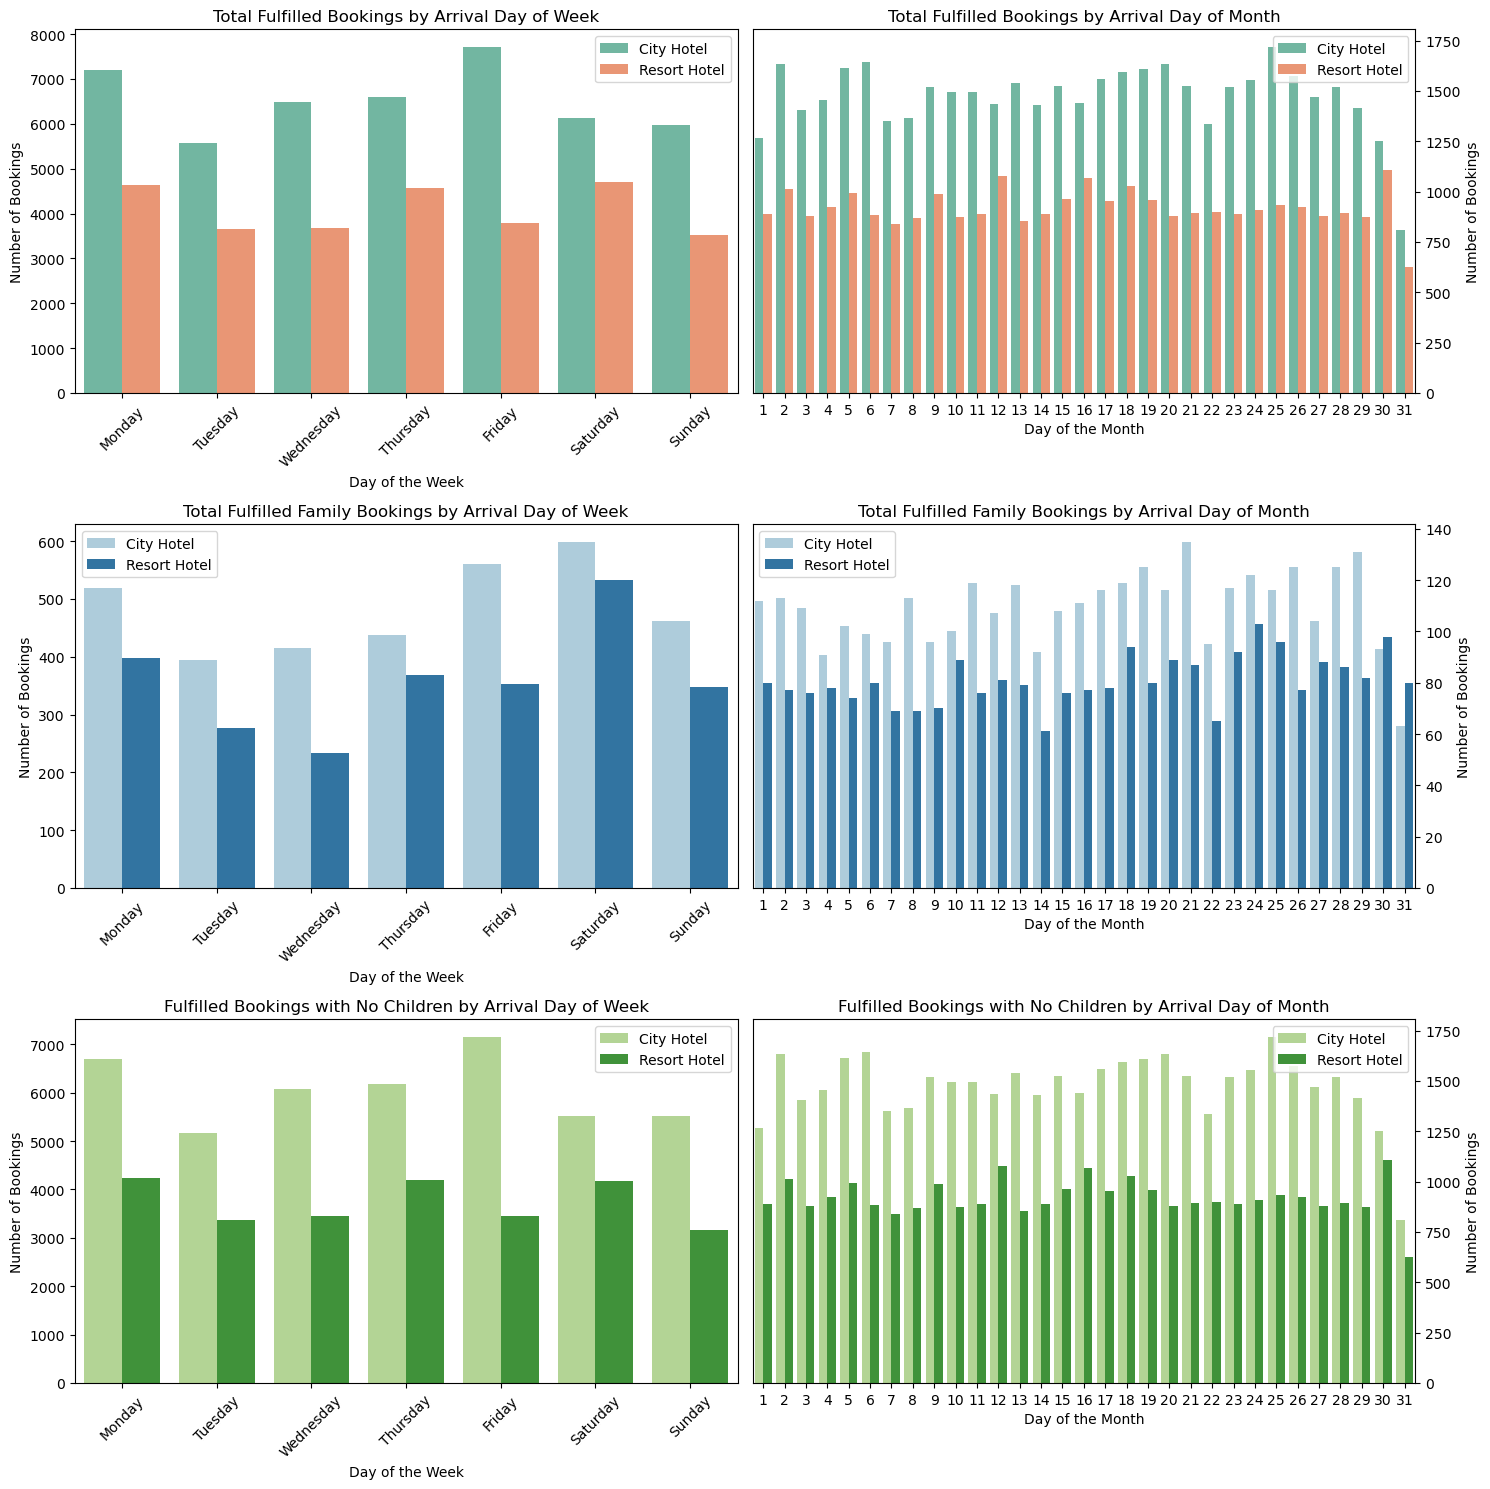

In [51]:
fig, axs = plt.subplots(3,2,figsize=(15,15))


# Total Bookings by Day of Week
sns.countplot(data=daily_book.sort_values(by='arrival_dow',key=lambda x: x.map(days)),
             x="arrival_dow",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             ax=axs[0][0])

axs[0][0].set_title("Total Fulfilled Bookings by Arrival Day of Week")
axs[0][0].legend(title=None);
axs[0][0].set_xlabel("Day of the Week")
axs[0][0].tick_params(axis='x', rotation=45)
axs[0][0].set_ylabel("Number of Bookings")


# Total Bookings by Day of Month
sns.countplot(data=daily_book.sort_values(by='arrival_day'),
             x="arrival_day",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             ax=axs[0][1])

axs[0][1].set_title("Total Fulfilled Bookings by Arrival Day of Month")
axs[0][1].legend(title=None);
axs[0][1].set_xlabel("Day of the Month")
axs[0][1].set_ylabel("Number of Bookings")
axs[0][1].yaxis.tick_right()
axs[0][1].yaxis.set_label_position('right')


# Families by Day of Week
sns.countplot(data=daily_book[daily_book['total_youth']!=0].sort_values(by='arrival_dow',key=lambda x: x.map(days)),
              x="arrival_dow",
              hue="type", hue_order = ["City Hotel", "Resort Hotel"],
              palette=paired_palette,
              ax=axs[1][0])

axs[1][0].set_title("Total Fulfilled Family Bookings by Arrival Day of Week")
axs[1][0].legend(title=None);
axs[1][0].set_xlabel("Day of the Week")
axs[1][0].tick_params(axis='x', rotation=45)
axs[1][0].set_ylabel("Number of Bookings")


# Families by Day of Month
sns.countplot(data=daily_book[daily_book['total_youth']!=0].sort_values(by='arrival_day'),
              x="arrival_day",
              hue="type", hue_order = ["City Hotel", "Resort Hotel"],
              palette=paired_palette,
              ax=axs[1][1])

axs[1][1].set_title("Total Fulfilled Family Bookings by Arrival Day of Month")
axs[1][1].legend(title=None);
axs[1][1].set_xlabel("Day of the Month")
axs[1][1].set_ylabel("Number of Bookings")
axs[1][1].yaxis.tick_right()
axs[1][1].yaxis.set_label_position('right')


# No Children by Day of Week
sns.countplot(data=daily_book[daily_book['total_youth']==0].sort_values(by='arrival_dow',key=lambda x: x.map(days)),
              x="arrival_dow",
              hue="type", hue_order = ["City Hotel", "Resort Hotel"],
              palette=[paired_palette[2],paired_palette[3]],
              ax=axs[2][0])

axs[2][0].set_title("Fulfilled Bookings with No Children by Arrival Day of Week")
axs[2][0].legend(title=None);
axs[2][0].set_xlabel("Day of the Week")
axs[2][0].tick_params(axis='x', rotation=45)
axs[2][0].set_ylabel("Number of Bookings")


# No Children by Day of Month
sns.countplot(data=daily_book.sort_values(by='arrival_day'),
              x="arrival_day",
              hue="type", hue_order = ["City Hotel", "Resort Hotel"],
              palette=[paired_palette[2],paired_palette[3]],
              ax=axs[2][1])

axs[2][1].set_title("Fulfilled Bookings with No Children by Arrival Day of Month")
axs[2][1].legend(title=None);
axs[2][1].set_xlabel("Day of the Month")
axs[2][1].set_ylabel("Number of Bookings")
axs[2][1].yaxis.tick_right()
axs[2][1].yaxis.set_label_position('right')

plt.tight_layout()
plt.show()

#### Which Month is best?

How does the month of arrival affect the price? Is either hotel more popular on a given month?

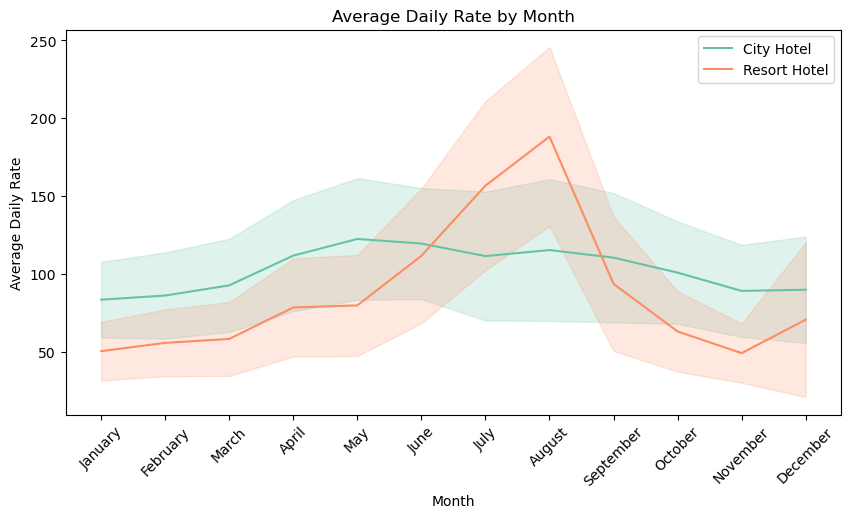

In [359]:
monthly_price = df_clean[['type','arrival_month','arrival_month_n','adr']]
monthly_price = monthly_price.sort_values(by='arrival_month_n')

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_price,
             x="arrival_month", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"],
             errorbar="sd")

plt.title("Average Daily Rate by Month")
plt.legend(title=None);
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")

plt.tight_layout
plt.show()

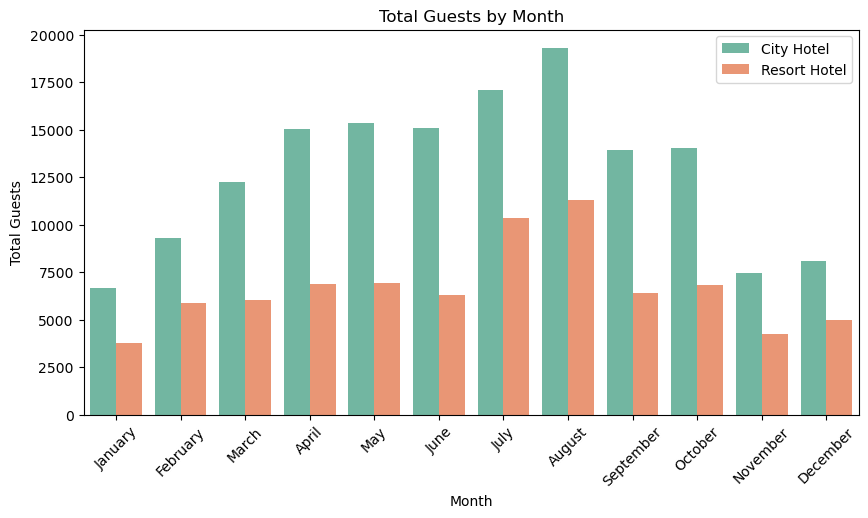

In [56]:
monthly_pop = df_clean.groupby(['type','arrival_month','arrival_month_n'], as_index=False)['total_guests'].sum().sort_values('arrival_month_n')

monthly_pop
plt.figure(figsize=(10,5))
sns.barplot(data=monthly_pop,
             x="arrival_month", y="total_guests",
             hue='type', hue_order = ["City Hotel", "Resort Hotel"])

plt.title("Total Guests by Month")
plt.legend(title=None)
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Total Guests")
plt.show()

#### When do families travel?

How many fulfilled bookings are for families? Is there a given month when more families travel?

In [62]:
len(family_bookings)

5895

In [63]:
len(adult_bookings)

68354

In [65]:
family_bookings = df_f[df_f['total_youth']!=0]
adult_bookings = df_f[df_f['total_youth']==0]
cl_couple_bookings = df_f[(df_f['adults']==2)&(df_f['total_youth']==0)]

print(f'{round(len(adult_bookings)/len(df_f)*100,1)}% of fulfilled bookings are for adults with no children.')
print(f'{round(len(cl_couple_bookings)/len(df_f)*100,1)}% of fulfilled bookings are for couples (2 adults) with no children.')
print(f'{round(len(family_bookings)/len(df_f)*100,1)}% of fulfilled bookings are for families (with 1 or more child).')

92.1% of fulfilled bookings are for adults with no children.
65.7% of fulfilled bookings are for couples (2 adults) with no children.
7.9% of fulfilled bookings are for families (with 1 or more child).


In [88]:
guests_by_month = df_f.groupby(['type','arrival_month','arrival_month_n'], as_index=False)[['total_guests','adults','total_youth']].sum().sort_values('arrival_month_n')
guests_by_month['adult_p'] = round(guests_by_month['adults']/guests_by_month['total_guests']*100,2)
guests_by_month['child_p'] = 100 - guests_by_month['adult_p']

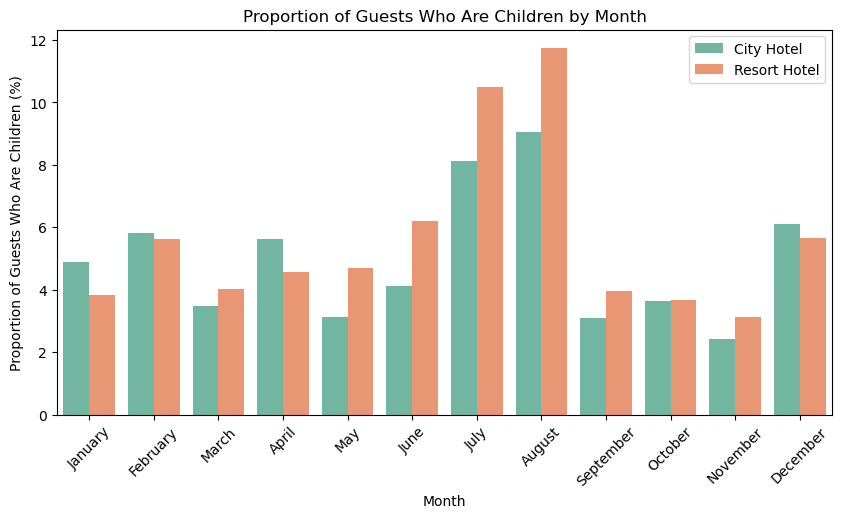

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(data=guests_by_month,
            x='arrival_month', y='child_p',
            hue='type', hue_order = ["City Hotel", "Resort Hotel"])
plt.title("Proportion of Guests Who Are Children by Month")
plt.legend(title=None)
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Proportion of Guests Who Are Children (%)")
plt.show()

#### Length of stay



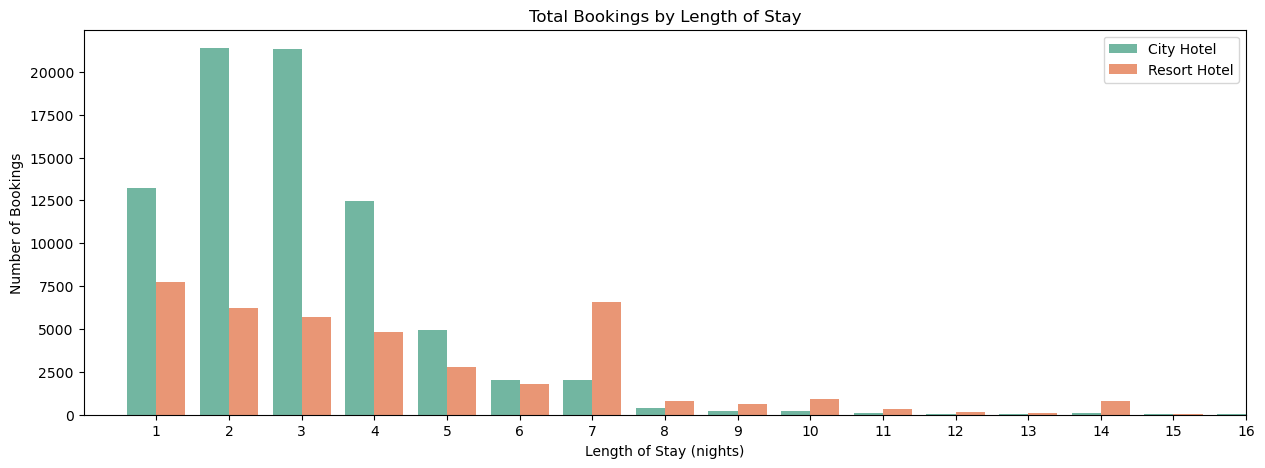

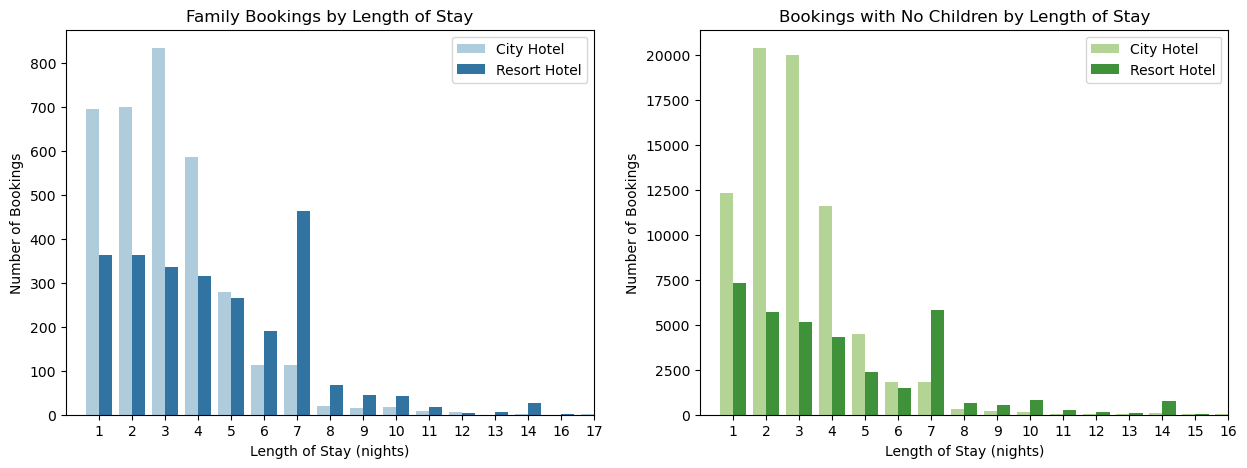

In [384]:
plt.figure(figsize = (15, 5))

sns.countplot(data=df_clean,
              x='total_nights',
              hue='type', hue_order = ["City Hotel", "Resort Hotel"])
plt.title('Total Bookings by Length of Stay')
plt.legend(title=None)
plt.xlabel('Length of Stay (nights)')
plt.xlim(-1,15)
plt.ylabel('Number of Bookings')
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15, 5))

sns.countplot(data=family_bookings,
              x='total_nights',
              hue='type', hue_order = ["City Hotel", "Resort Hotel"],
              palette=paired_palette,
              ax=ax1)
ax1.set_title('Family Bookings by Length of Stay')
ax1.legend(title=None)
ax1.set_xlabel('Length of Stay (nights)')
ax1.set_xlim(-1,15)
ax1.set_ylabel('Number of Bookings')

sns.countplot(data=df_clean[df_clean['total_youth']==0],
              x='total_nights',
              hue='type', hue_order = ["City Hotel", "Resort Hotel"],
              palette=[paired_palette[2],paired_palette[3]],
              ax=ax2)
ax2.set_title('Bookings with No Children by Length of Stay')
ax2.legend(title=None)
ax2.set_xlabel('Length of Stay (nights)')
ax2.set_xlim(-1,15)
ax2.set_ylabel('Number of Bookings')
plt.show()

#### ADR by Length of stay

Does a longer stay mean a better price?

In [378]:
length_price = df_f[['type','total_nights','adr']]
length_price

,type,total_nights,adr
0,Resort Hotel,1,75.00
1,Resort Hotel,1,75.00
2,Resort Hotel,2,98.00
3,Resort Hotel,2,98.00
4,Resort Hotel,2,107.00
...,...,...,...
118333,City Hotel,7,96.14
118334,City Hotel,7,225.43
118335,City Hotel,7,157.71
118336,City Hotel,7,104.40


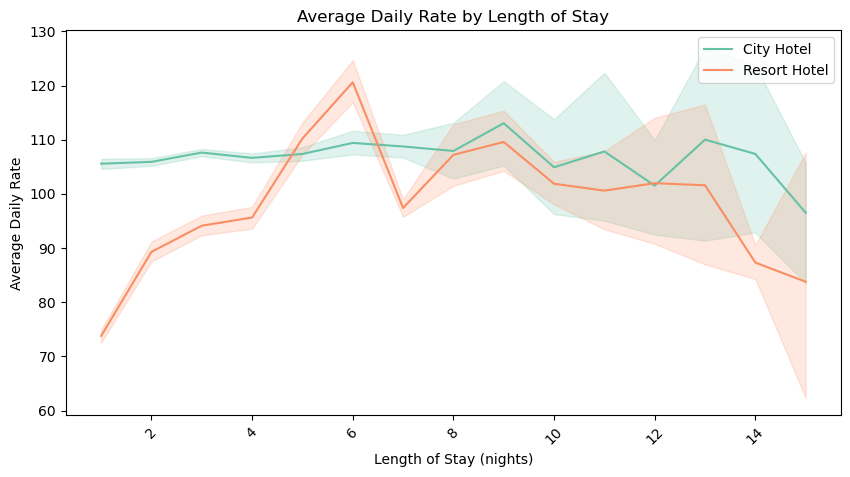

In [383]:
# length_price = df_clean[['type','total_nights','adr']]
# length_price = length_price.sort_values(by='total_nights')

plt.figure(figsize=(10,5))
sns.lineplot(data=length_price[length_price['total_nights']<16],
             x="total_nights", y="adr",
             hue="type", hue_order = ["City Hotel", "Resort Hotel"]
            )

plt.title("Average Daily Rate by Length of Stay")
plt.legend(title=None);
plt.xlabel("Length of Stay (nights)")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")

plt.tight_layout
plt.show()

#### Lead time room type

Does booking far in advance guarantee your requested room type?

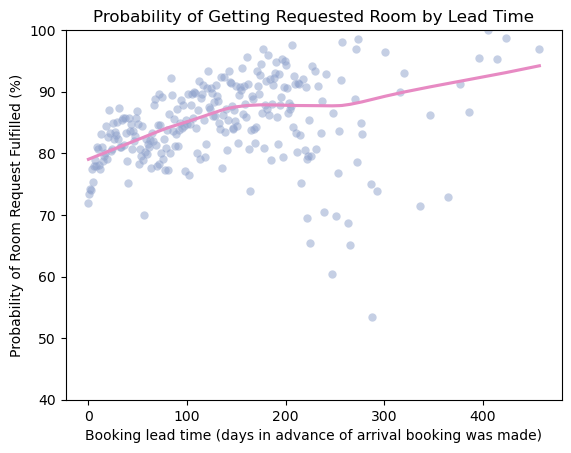

In [180]:
req_ful = df_f.groupby(['lead_time','room_fulfilled'])['room_fulfilled'].count().unstack().fillna(0).reset_index()
req_ful['total']=req_ful[True]+req_ful[False]
req_ful['chance']=req_ful[True]/req_ful['total']*100

# remove data with small sample size (total requests < 50)
req_ful = req_ful[req_ful['total']>50]
sns.regplot(data=req_ful,
            x='lead_time', y='chance',
            lowess=True,
            scatter_kws={'lw':0,'alpha':0.5,'color':palette[2]},
            line_kws={'color':palette[3]}
           );

plt.title('Probability of Getting Requested Room by Lead Time')
plt.xlabel('Booking lead time (days in advance of arrival booking was made)')
plt.ylabel('Probability of Room Request Fulfilled (%)')
plt.ylim(40,100)

plt.show()

#### Cancellations with deposit

Does making a deposit reduce the rate of cancellation?

#### Room type to cook with children

Do families with children tend to book a partciular room type?

In [356]:
rooms_a = df_f.groupby(['type','room_type_a'])['room_type_a'].count()
rooms_r = df_f.groupby(['type','room_type_r'])['room_type_r'].count()
# rooms_all = pd.concat([rooms_r,rooms_a],axis=1).unstack(0).fillna(0).astype('int').T

city_r = rooms_r['City Hotel']
city_a = rooms_a['City Hotel']
city_all = pd.concat([city_r,city_a],axis=1).fillna(0).astype('int')
city_all_prop = (city_all/city_all.sum()).T  # normalise to sum to 1 and transpose
city_all

,room_type_r,room_type_a
A,35027,29923
B,614,1384
C,8,138
D,7573,10662
E,1031,1618
F,1081,1288
G,360,564
K,0,117


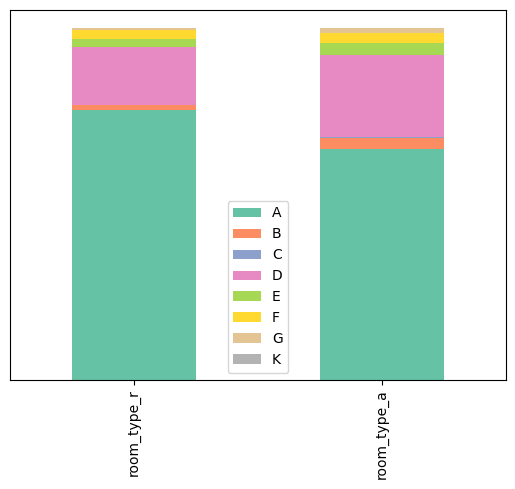

In [354]:
city_all.plot(kind='bar', stacked=True);
plt.yticks([]);

In [194]:
df_f[df_f['total_youth']>0].groupby(['type','room_type_r'])['room_type_r'].count().fillna(0)

type          room_type_r
City Hotel    A              1609
              B                84
              C                 1
              D               376
              E               231
              F               886
              G               201
Resort Hotel  A               644
              C               437
              D               304
              E               179
              F                68
              G               616
              H               259
Name: room_type_r, dtype: int64

In [181]:
rooms = df_f.groupby(['room_type'])

KeyError: 'room_type'

#### Advance booking by number of kids

Do families book further in advance?

In [93]:
children_lead_time = df_f.groupby('total_youth')['lead_time'].mean()

In [94]:
children_lead_time

total_youth
0     80.807429
1     78.337878
2     72.467564
3     68.633803
9     11.000000
10    37.000000
Name: lead_time, dtype: float64

#### Where in the world...

What countries do the majority of visitors come from?

In [394]:
countries = df_f.groupby('country').size().reset_index(name = 'count')

import plotly.express as px

fig = px.choropleth(countries,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = "dense",
                    title="Nationality of visitors"
             )

fig.write_html("map.html")
fig.show()